In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.integrate import quad
from scipy.constants import h, c, k, N_A # import physical constants
from scipy.misc import derivative 

# Two-level system

Here we consider a system where two energy level are possible; the ground state (0) and the first excited state, $\epsilon$. The partition function is

$$
q = 1+e^{-\epsilon / k_BT}
$$

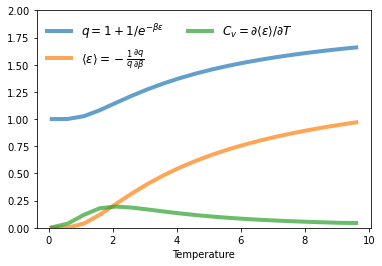

In [2]:
def q(T): return 1+np.exp(-epsilon/(k*T))
def energy(T): return epsilon / (np.exp(epsilon/(k*T)+1) ) # atkins p625 (10th)
def Cv(T): return np.gradient( energy(T)/k, T[1]-T[0] )

fig, ax = plt.subplots()
epsilon=k*4
T=np.arange(0.1, 10, 0.5)
plt.plot(T,q(T), label=r'$q = 1+1 / e^{-\beta \epsilon}$', lw=4, alpha=0.7)
plt.plot(T, energy(T)/k, label=r'$\langle \epsilon \rangle = -\frac{1}{q}\frac{\partial q}{\partial \beta}$',
         lw=4, alpha=0.7)
plt.plot(T, Cv(T), label=r'$C_v=\partial \langle \epsilon \rangle / \partial T$', lw=4, alpha=0.7)
plt.legend(frameon=False, loc=0, fontsize='large', ncol=2)
plt.ylim(0, 2)
plt.xlabel('Temperature');

# Rotational Partition Function

The following plots the rotational partition function and how each quantum number, $J$, contributions. We use `ipywidgets` to add an interactive slider to control the temperature.
The manual for `ipywidgets` can be found [here](https://ipywidgets.readthedocs.io/en/latest/index.html).

In [3]:
B = 10.591 * 100 # 1/m # rotational wave-number (related to moment of inertia)
J = np.arange(0,15,1)  # quantum numbers (called "l" in Dill's book)

def q(J,beta):
    ''' rotational partition function for a given J '''
    return (2*J+1) * np.exp( -beta*h*c*B*J*(J+1) )

def qrot(beta):
    ''' partition function for "inifinite" number of quantum numbers '''
    J = np.arange(0,500,1)
    return np.sum( q(J,beta) )

def qrotHT(beta):
    ''' partition function in the high temperature limit, i.e. summation --> integral '''
    return 1/(beta*h*c*B)

def plot(T):
    ''' plots partition function at given temperature '''
    beta = 1/(k*T)
    plt.plot(J, q(J,beta).cumsum(), 'b--o', alpha=0.7, lw=2, ms=10,
             label=r'Explicit summation <$E$>={:.2f} kT'
             .format(-derivative( qrot, beta, dx=0.001*beta ) / qrot(beta) * beta) )
    plt.plot( [0,1000], [qrotHT(beta),qrotHT(beta)], 'r-', alpha=0.5, lw=4,
             label=r'High temperature limit <$E$>={:.2f} kT'
             .format(-derivative( qrotHT, beta, dx=0.001*beta ) / qrotHT(beta) * beta))
    plt.xlim( 0, 14 )
    plt.xlabel( 'Quantum number, $J$' )
    plt.ylabel( 'Summed partition function, $q$' )
    plt.legend(loc=0, frameon=False)
    plt.title('Rotational Partition Function, $q_r$')

# this part sets up a temperature slider to control the plot
i = interact(plot, T=(50, 1000), continuous_update=False)
i.widget.children[0].description=r'$T$ (Kelvin)';

interactive(children=(IntSlider(value=525, description='T', max=1000, min=50), Output()), _dom_classes=('widge…